<a href="https://colab.research.google.com/github/Tarsha777/Prodigy/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
df=pd.read_csv("/train.csv")

In [95]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
#checking for nan values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [108]:
#replaceing and droping the nan values
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['Cabin'],inplace=True)

In [71]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Fare'>

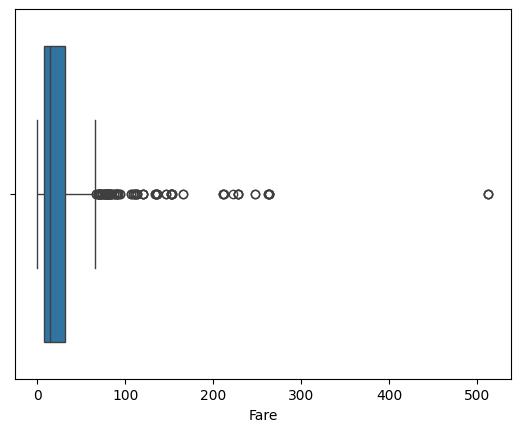

In [78]:
#checking for outliers
import seaborn as sns
sns.boxplot(x=df['Fare'])


<Axes: xlabel='Fare'>

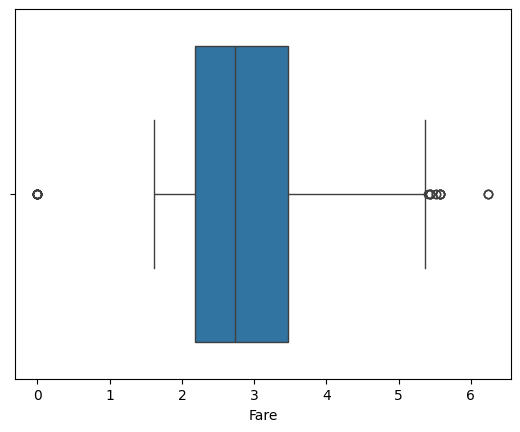

In [109]:
#handling outliers
df['Fare'] = df['Fare'].apply(lambda x: np.log(x + 1))
sns.boxplot(x=df['Fare'])

In [110]:
#combining 2 features to form a single feature which still holds the total size of the family
df['FamilySize'] = df['Parch'] + df['SibSp']
df.drop(columns=['Parch', 'SibSp'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,2.110213,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,4.280593,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,2.188856,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,3.990834,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,2.202765,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,2.639057,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,3.433987,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,3.196630,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,3.433987,C,0


In [111]:
#
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.drop(columns=['Name'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,A/5 21171,2.110213,S,1,Mr
1,2,1,1,female,38.0,PC 17599,4.280593,C,1,Mrs
2,3,1,3,female,26.0,STON/O2. 3101282,2.188856,S,0,Miss
3,4,1,1,female,35.0,113803,3.990834,S,1,Mrs
4,5,0,3,male,35.0,373450,2.202765,S,0,Mr


In [103]:
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs",
    "Master": "Master", "Dr": "Officer", "Rev": "Officer",
    "Col": "Officer", "Major": "Officer", "Mlle": "Miss",
    "Countess": "Royalty", "Ms": "Miss", "Lady": "Royalty",
    "Jonkheer": "Royalty", "Don": "Royalty", "Dona": "Royalty",
    "Mme": "Mrs", "Capt": "Officer", "Sir": "Royalty"
}
df['Title'] = df['Title'].map(title_mapping)


In [104]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,A/5 21171,2.110213,S,1,Mr
1,2,1,1,female,38.0,PC 17599,4.280593,C,1,Mrs
2,3,1,3,female,26.0,STON/O2. 3101282,2.188856,S,0,Miss
3,4,1,1,female,35.0,113803,3.990834,S,1,Mrs
4,5,0,3,male,35.0,373450,2.202765,S,0,Mr


In [112]:
#checking once again
df.isnull().sum()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   FamilySize   891 non-null    int64  
 9   Title        891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [85]:
df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.000000,A/5 21171,2.110213,S,1,Mr
1,2,1,1,female,38.000000,PC 17599,4.280593,C,1,Mrs
2,3,1,3,female,26.000000,STON/O2. 3101282,2.188856,S,0,Miss
3,4,1,1,female,35.000000,113803,3.990834,S,1,Mrs
4,5,0,3,male,35.000000,373450,2.202765,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,211536,2.639057,S,0,Officer
887,888,1,1,female,19.000000,112053,3.433987,S,0,Miss
888,889,0,3,female,29.699118,W./C. 6607,3.196630,S,3,Miss
889,890,1,1,male,26.000000,111369,3.433987,C,0,Mr


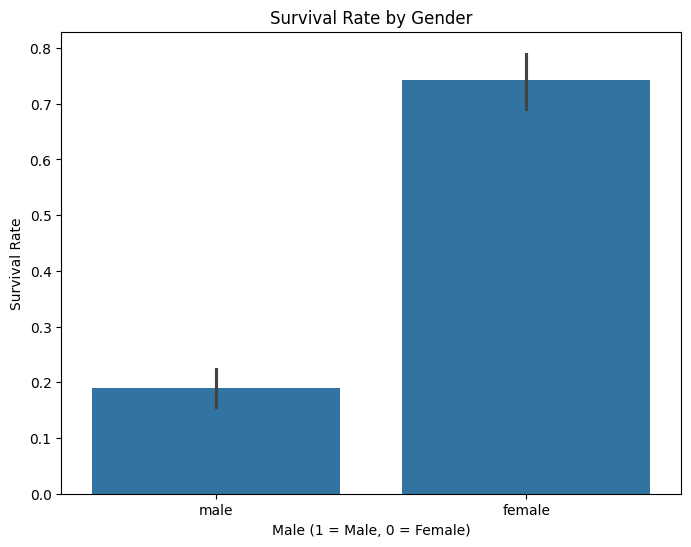

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Male (1 = Male, 0 = Female)')
plt.ylabel('Survival Rate')
plt.show()


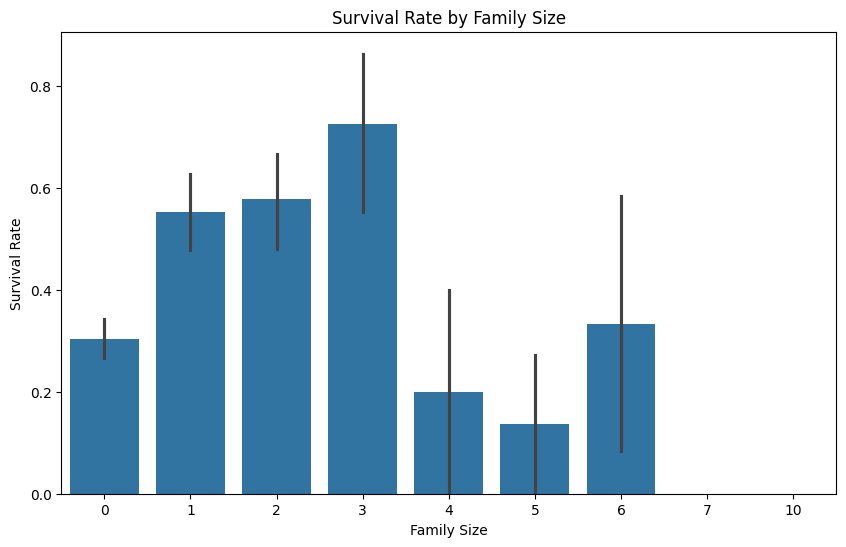

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()
